## This is the code for "Waveguide based squeezed light sources in LiNbO_3 platform"

Author: Erik Anders Torsten Svanberg, Vaishali Adya.
Any errors found, please send to: esvanb@kth.se

References:
[1] Takahiro Kashiwazaki, Taichi Yamashima, Koji Enbutsu, Takushi Kazama, Asuka Inoue, Kosuke Fukui, Mamoru Endo, Takeshi Umeki, Akira Furusawa; Over-8-dB squeezed light generation by a broadband waveguide optical parametric amplifier toward fault-tolerant ultra-fast quantum computers. Appl. Phys. Lett. 5 June 2023; 122 (23): 234003. https://doi.org/10.1063/5.0144385

In [227]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy as sp

In [228]:
#Basic equations
def power2dB(power):
    #Convert power (linear scale) to dB
    return 10*np.log10(power)

def dB2power(dB):
    #Convert dB to power (linear scale)
    return 10**(dB/10)

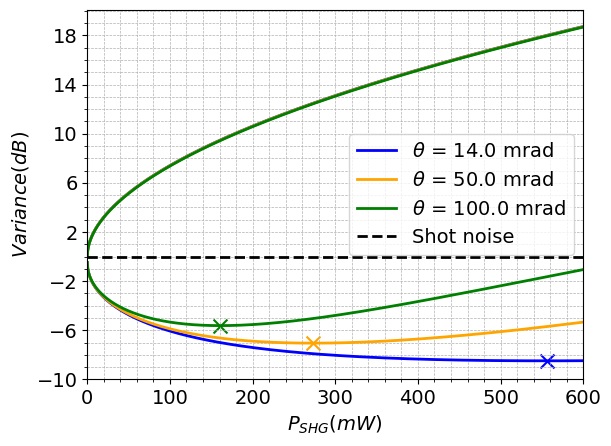

In [229]:
#Figure 1
#Plot squeezing vs input power for different values of theta

def variance(P_in,alpha,eta,theta,theta_rms):
    #Calculate variance (squeezing and anti-squeezing) vs input power for given values of alpha, eta, theta, and theta_rms
    alpha = 8.2
    R = np.sqrt(P_in*alpha)
    return eta*(1-theta_rms**2)*(np.exp(2*R)*np.cos(theta)**2 + eta*np.exp(-2*R)*np.sin(theta)**2) + eta*theta_rms**2*(np.exp(-2*R)*np.cos(theta)**2 + eta*np.exp(2*R)*np.sin(theta)**2) + 1-eta

def plot_variance():
    #Plot variance (squeezing and anti-squeezing) vs input power for different values of theta
    alpha = 8.2
    P_in = np.linspace(0,0.6,1000)
    eta = 0.88
    theta_ls = [14e-3,50e-3,100e-3]
    color_ls = ['blue','orange','green']

    for theta_rms in theta_ls:
        sqz = variance(P_in,alpha,eta,np.pi/2,theta_rms)
        plt.plot(P_in*1e3,power2dB(sqz),color=color_ls[theta_ls.index(theta_rms)],linewidth=2,label=r'$\theta$ = '+str(theta_rms*1e3) + ' mrad')
        asqz = variance(P_in,alpha,eta,0,theta_rms)
        plt.plot(P_in*1e3,power2dB(asqz),color=color_ls[theta_ls.index(theta_rms)],linewidth=2)
        P_opt = 1/(4*alpha)*np.log(np.sqrt(theta_rms**2/(1-theta_rms**2)))**2
        #Mark optimal power for squeezing with an X
        plt.scatter(P_opt*1e3,power2dB(variance(P_opt,alpha,eta,np.pi/2, theta_rms)),color=color_ls[theta_ls.index(theta_rms)],marker='x',s=100)



    #Also label shot noise at y=0
    plt.axhline(0, color='black',linewidth=2,linestyle='--',label='Shot noise')
    plt.xlabel(r'$P_{SHG} (mW)$',fontsize=14)
    plt.ylabel(r'$Variance (dB)$',fontsize=14)
    #change yticks to go with 4 in steps
    plt.xticks(fontsize=14)
    plt.yticks(np.arange(-10,20,4),fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.xlim(0,600)
    plt.minorticks_on()
    plt.show()

plot_variance()

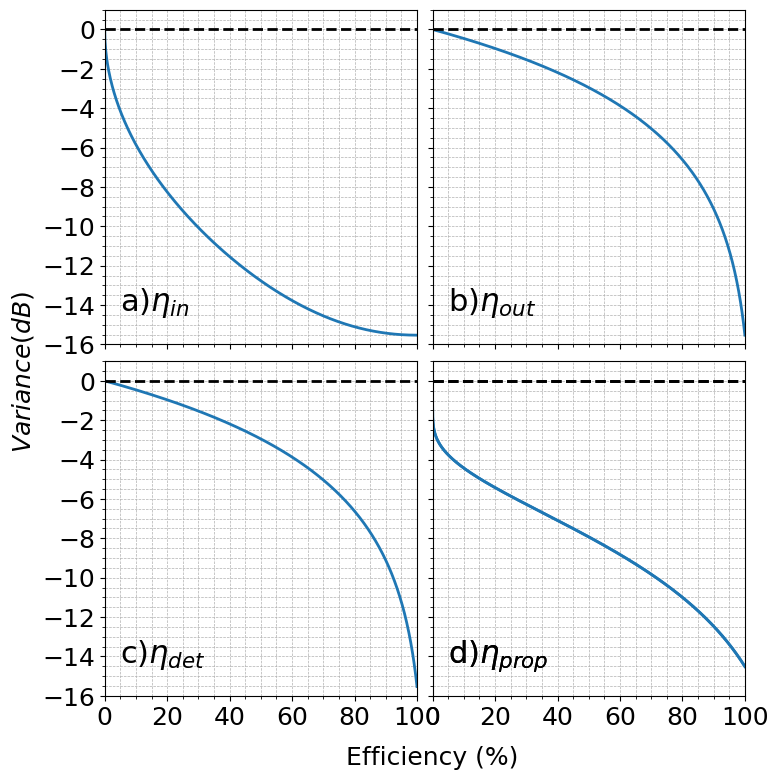

In [230]:
#Figure 2
def four_panels():
    #Make 4 subplots for squeezing vs eta_in, eta_out, eta_det, and eta_prop
    #This time make it prettier, with labels a)-d) for each plot and a single efficiency label on the x-axis
    #Along with a single variance label on the y-axis. Furthermore the y-ticks on the rightmost plots are removed
    #Along with the x-ticks on  top plots
    fig, axs = plt.subplots(2,2,figsize=(8,8))
    fontsize = 18
    alpha = 8.2
    theta_rms = 14e-3
    P_in = 1/(4*alpha)*np.log(np.sqrt(theta_rms**2/(1-theta_rms**2)))**2 #Optimal power for squeezing

    #Plot squeezing vs incoupling efficiency
    eta_in = np.linspace(0,1,1000)
    eta_out = 1
    sqz = variance(eta_in*P_in,alpha,eta_out,np.pi/2,theta_rms)   
    axs[0,0].plot(eta_in*100,10*np.log10(sqz),linewidth=2,label = "Squeezing")
    axs[0,0].axhline(0, color='black',linewidth=2,linestyle='--',label='Shot noise')
    #Create text box in corner with label a) eta_in
    axs[0,0].text(0.05,0.1,'a)' + r'$\eta_{in}$',transform=axs[0,0].transAxes,fontsize=fontsize+4)
    axs[0,0].set_ylabel(r'$Variance (dB)$',fontsize=fontsize)
    axs[0,0].tick_params(axis="x", labelsize=fontsize)
    axs[0,0].tick_params(axis="y", labelsize=fontsize)
    axs[0,0].set_yticks(np.arange(-16,2,2))
    axs[0,0].set_xticks(np.arange(0,120,20))
    axs[0,0].set_xticklabels([])
    axs[0,0].set_ylim(-16,1)
    axs[0,0].set_xlim(0,100)
    axs[0,0].grid(which='both', linestyle='--', linewidth=0.5)
    axs[0,0].minorticks_on()

    eta_plots = ["out","det"]
    eta_labels = ["b)","c)"]

    for i in range(1,3):
        ax = axs[(i-1)-i//3,i%2]
        eta = np.linspace(0,1,1000)
        sqz = variance(P_in,alpha,eta,np.pi/2,theta_rms)   
        ax.plot(eta*100,10*np.log10(sqz),linewidth=2,label = "Squeezing")
        ax.axhline(0, color='black',linewidth=2,linestyle='--',label='Shot noise')
        ax.text(0.05,0.1,eta_labels[i-1] + r'$\eta_{' + eta_plots[i-1] + '}$',transform=ax.transAxes,fontsize=fontsize+4)
        ax.tick_params(axis="x", labelsize=fontsize)
        ax.tick_params(axis="y", labelsize=fontsize)
        ax.set_yticks(np.arange(-16,2,2))
        ax.set_xticks(np.arange(0,120,20))
        ax.set_ylim(-16,1)
        ax.set_xlim(0,100)
        if i%2 == 1:
            ax.set_yticklabels([])
        if i < 2:
            ax.set_xticklabels([])
        ax.grid(which='both', linestyle='--', linewidth=0.5)
        ax.minorticks_on()

        ax = axs[1,1]
        eta = np.linspace(1e-6,1-1e-6,int(1e6))
        sqz = calculate_propagation_sqz(P_in,alpha,eta,np.pi/2,theta_rms) #Use proper equation for propagation efficiency  
        ax.plot(eta*100,10*np.log10(sqz),linewidth=2,label = "Squeezing",color='tab:blue')

        ax.axhline(0, color='black',linewidth=2,linestyle='--',label='Shot noise')
        ax.text(0.05,0.1,'d)' + r'$\eta_{prop}$',transform=ax.transAxes,fontsize=fontsize+4)
        ax.tick_params(axis="x", labelsize=fontsize)
        ax.tick_params(axis="y", labelsize=fontsize)
        ax.set_yticks(np.arange(-16,2,2))
        ax.set_xticks(np.arange(0,120,20))
        ax.set_ylim(-16,1)
        ax.set_xlim(0,100)
        ax.set_yticklabels([])
        ax.grid(which='both', linestyle='--', linewidth=0.5)
        ax.minorticks_on()


    axs[0,0].set_ylabel(r"$Variance (dB)$",fontsize=fontsize)
    axs[0,0].yaxis.set_label_coords(-0.22, -.08)

    axs[1,0].set_xlabel("Efficiency (%)",fontsize=fontsize)
    axs[1,0].xaxis.set_label_coords(1.05, -.15)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0.05)  # Adjust these values as needed
    plt.show()

def calculate_propagation_sqz(P_in,alpha,eta,theta,theta_rms):
    '''This function compares the approximation of loss in a waveguide vs the exact solution.'''
    R = np.sqrt(P_in*alpha)
    eta_prop_sqz = R*(1-np.exp(-2*R)*eta)/((R-0.5*np.log(eta))*1-np.exp(-2*R)) 
    eta_prop_asqz = R*(np.exp(2*R)*eta-1)/((R+0.5*np.log(eta))*(np.exp(2*R)-1))
    sqz_exact = eta_prop_sqz*np.exp(-2*R) + 1-eta_prop_sqz
    asqz_exact = eta_prop_asqz*np.exp(2*R) + 1-eta_prop_asqz
    sqz_exact_meas = (1-theta_rms**2)*sqz_exact + theta_rms**2*asqz_exact
    return sqz_exact_meas

four_panels()

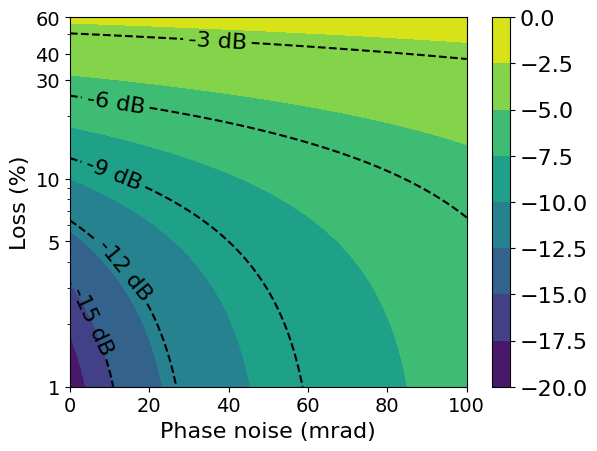

In [231]:
#Figure 4
def calculate_max_sqz(theta_rms,eta):
    '''This function calculates the maximum squeezing possible for a given efficiency and theta_rms.'''
    V_min = 2*eta*theta_rms*np.sqrt(1-theta_rms**2) + 1-eta
    return 10*np.log10(V_min) #Convert to dB

def contour_plot():
    theta_rms = np.linspace(0,100e-3,200) #Go from 0 to 200mrad
    loss = np.linspace(0.01,0.6,200)
    X,Y = np.meshgrid(theta_rms*1e3,loss*100)
    Z = np.zeros_like(X)
    for i in range(len(theta_rms)):
        for j in range(len(loss)):
            Z[j, i] = calculate_max_sqz(X[j, i]*1e-3, 1-Y[j, i]/100)
    plt.contourf(X,Y,Z)
    plt.xlabel(r'Phase noise (mrad)',fontsize=16)
    plt.ylabel(r'Loss (%)',fontsize=16)
    plt.colorbar()
    #Make y-axis logarithmic
    plt.yscale('log')
    plt.ylim(1,60)
    #Change y-ticks to go from 1 to 60 in multiplicative steps
    plt.yticks([1,5,10,30,40,60],['1','5','10','30','40','60'],fontsize=14)
    plt.xticks(fontsize=14)

    # Add specific curves for certain squeezing levels
    levels = [-15,-12,-9,-6,-3]
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linestyles='dashed')
    plt.clabel(contour_lines, fmt='%2.0f dB', colors='black')
    plt.show()
contour_plot()


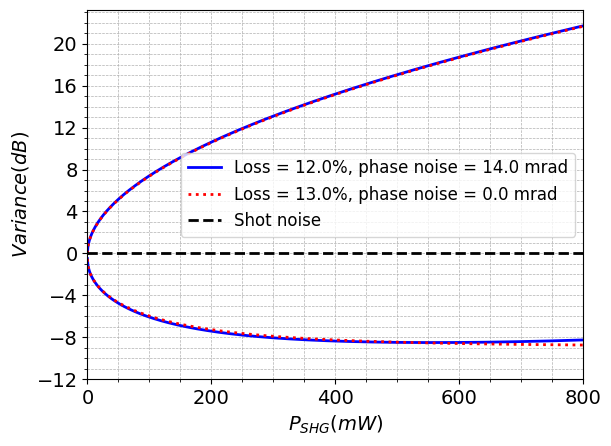

In [232]:
#Figure 5
def plot_squeezing_input_power():
    alpha = 8.2
    P_in = np.linspace(0, 0.8, 1000)
    eta = 0.88  # 12 %loss
    theta_rms = 14e-3  # phase noise

    # Squeezing and anti-squeezing with phase noise and 12% loss
    sqz_phase_noise = variance(P_in, alpha, eta, np.pi/2,theta_rms)
    asqz_phase_noise = variance(P_in, alpha, eta, 0,theta_rms)
    label = 'Loss = ' + str(round((1-eta)*100,1)) + '%, phase noise = ' + str(round(theta_rms*1e3,1)) + ' mrad'
    plt.plot(P_in * 1e3, 10 * np.log10(sqz_phase_noise), color='blue', linewidth=2, label=label)
    plt.plot(P_in * 1e3, 10 * np.log10(asqz_phase_noise), color='blue', linewidth=2)

    def fit_variance(P_in, eta):
        return variance(P_in,alpha, eta, np.pi/2,0)

    popt, pcov = curve_fit(fit_variance, P_in, sqz_phase_noise)
    eta_fit = popt[0]
    #eta_fit = 0.914 #13% loss
    sqz_fit = variance(P_in,alpha, eta_fit,np.pi/2,0)
    label_fit = 'Loss = ' + str(round((1-eta_fit)*100,1)) + '%, phase noise = ' + str(round(0*1e3,1)) + ' mrad'
    plt.plot(P_in * 1e3, 10 * np.log10(sqz_fit), color='red', linewidth=2, linestyle=':', label=label_fit)
    asqz_fit = variance(P_in, alpha, eta_fit, 0,0)
    plt.plot(P_in * 1e3, 10 * np.log10(asqz_fit), color='red', linewidth=2, linestyle=':')
    #Mark shot noise level
    plt.axhline(0, color='black', linewidth=2, linestyle='--', label='Shot noise')

    plt.xlabel(r'$P_{SHG} (mW)$', fontsize=14)
    plt.ylabel(r'$Variance (dB)$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(np.arange(-12, 22, 4), fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.xlim(0, 800)

plot_squeezing_input_power()
plt.show()

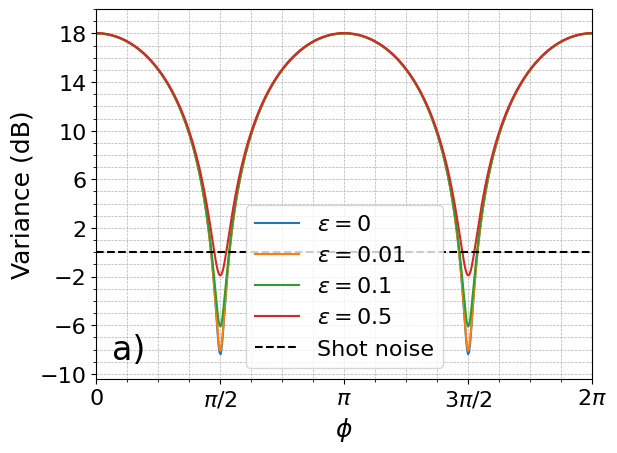

In [233]:
#Figure 6a
def leakage5050(theta,epsilon,sqz,asqz):
    #Defines the real leakage
    return asqz*np.cos(theta)**2 + sqz*np.sin(theta)**2 + epsilon

def plot_leakage5050(sqz,asqz):
    #Plot the real leakage vs the LO phase phi
    theta = np.linspace(0,2*np.pi,500)
    epsilon = [0,0.01,0.1,0.5]
    sqz = dB2power(-sqz)
    asqz = dB2power(asqz)
    #Now we are ready to plot
    plt.figure()
    for eps in epsilon:
        var = leakage5050(theta,eps,sqz,asqz)
        var = power2dB(var)
        plt.plot(theta,var,label=r'$\epsilon = $'+str(eps))

    #Mark shot noise level with dashed blacked line
    plt.axhline(y=0, color='black',label='Shot noise', linestyle='dashed')
    plt.xlabel(r'$\phi$',fontsize=18)
    plt.ylabel('Variance (dB)',fontsize=18)
    #Create x-ticks with 0 to 2*pi
    xticks = np.linspace(0,2*np.pi,5)
    plt.xticks(xticks, [r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
    plt.xlim(0,2*np.pi)
    plt.ylim(power2dB(sqz)-2,power2dB(asqz)+2)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.yticks(np.arange(-10,20,4),fontsize=16)
    plt.xticks(fontsize=16)
    #Add text box in bottom left corner which says a)
    plt.text(0.15, 0.15, 'a)', fontsize=24, transform=plt.gcf().transFigure)
    plt.minorticks_on()
    plt.legend()
    plt.show()

plot_leakage5050(8.4,18) #8.4 dB squeezing and 18 dB anti-squeezing are values from [1]

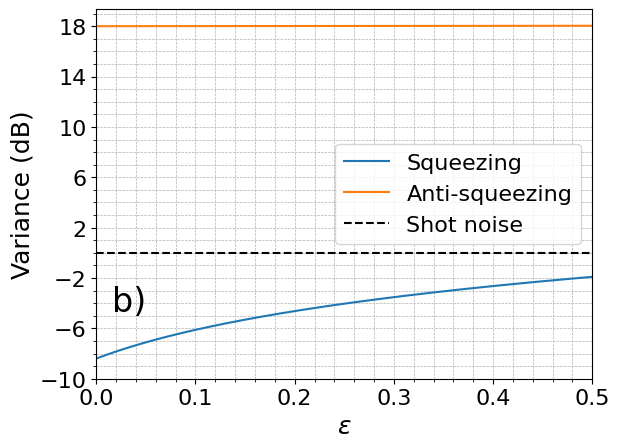

In [234]:
#Figure 6b
def plot_sqz_vs_leakage_real(init_sqz,init_asqz):
    #Plot squeezing vs the real leakage
    init_sqz = dB2power(-init_sqz)
    init_asqz = dB2power(init_asqz)
    epsilon = np.linspace(0,0.5,500)
    sqz = np.zeros(len(epsilon))
    asqz = np.zeros(len(epsilon))
    for i in range(len(epsilon)):
        sqz[i] = leakage5050(np.pi/2,epsilon[i],init_sqz,init_asqz)
        asqz[i] = leakage5050(0,epsilon[i],init_sqz,init_asqz)
    #Now plot
    plt.plot(epsilon,power2dB(sqz),label='Squeezing')
    plt.plot(epsilon,power2dB(asqz),label='Anti-squeezing')
    #Also plot the shot noise level
    plt.axhline(y=0, color='black',label='Shot noise', linestyle='dashed')
    plt.legend()
    plt.xlim(0,0.5)
    plt.yticks(np.arange(-10,20,4),fontsize=16)
    plt.xticks(np.arange(0,0.6,0.1),fontsize=16)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    #Make all text in the plot bigger
    plt.rcParams.update({'font.size': 16})
    plt.xlabel(r'$\epsilon$',fontsize=18)
    plt.ylabel('Variance (dB)',fontsize=18)
    plt.text(0.15, 0.25, 'b)', fontsize=24, transform=plt.gcf().transFigure)
    plt.minorticks_on()
    plt.show()

plot_sqz_vs_leakage_real(8.4,18)

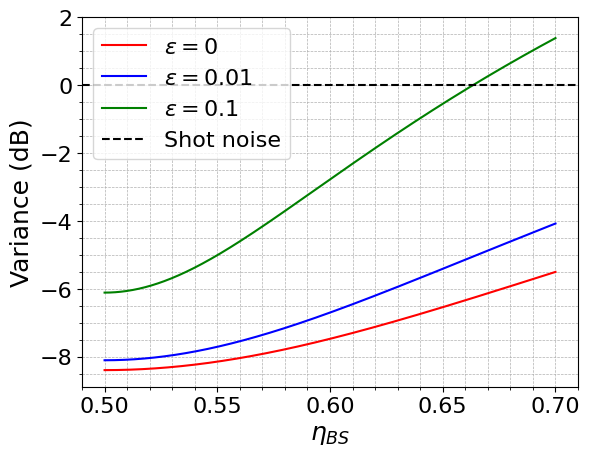

In [235]:
#Figure 7 

def leakage_imperfect_BS(theta,epsilon,nBS,sqz,asqz):
    P_LO = 5e-3 #Power of the LO, does not matter since we divide by the vacuum fluctuations
    V_meas = P_LO*4*nBS*(1-nBS)*(asqz*np.cos(theta)**2 + sqz*np.sin(theta)**2 + epsilon)+P_LO*(2*nBS-1)**2*(1+epsilon*asqz) 
    + P_LO*2*np.sqrt(epsilon*nBS*(1-nBS))*(1-2*nBS)*np.cos(theta)*(1-asqz)
    V_vac = P_LO
    return V_meas/V_vac

def plot_sqz_vs_BS_efficiency(init_sqz,init_asqz):
    #We wish to plot the squeezing vs the BS efficiency for different leakage levels
    init_sqz = dB2power(-init_sqz)
    init_asqz = dB2power(init_asqz)
    nBS = np.linspace(0.5,0.7,500)
    sqz = np.zeros(len(nBS))
    asqz = np.zeros(len(nBS))

    leakage_levels = [0,0.01,0.1]
    #Define the 3 colours we will use
    colors = ['red','blue','green']

    #Now we are ready to plot
    plt.figure()
    for j in range(len(leakage_levels)):
        for i in range(len(nBS)):
            sqz[i] = leakage_imperfect_BS(np.pi/2,leakage_levels[j],nBS[i],init_sqz,init_asqz)
            asqz[i] = leakage_imperfect_BS(0,leakage_levels[j],nBS[i],init_sqz,init_asqz)
        #plt.plot(nBS,power2dB(sqz),label=r'$Squeezing, \epsilon = $'+str(leakage_levels[j]),color = colors[j])
        #plt.plot(nBS,power2dB(asqz),label=r'$Anti-Squeezing, \epsilon = $'+str(leakage_levels[j]),color = colors[j])
        plt.plot(nBS,power2dB(sqz),label=r'$\epsilon = $'+str(leakage_levels[j]),color = colors[j])

    #Mark shot noise level with dashed blacked line
    plt.axhline(y=0, color='black',label='Shot noise', linestyle='dashed')
    plt.xlabel(r'$\eta_{BS}$',fontsize=18)
    plt.ylabel('Variance (dB)',fontsize=18)
    #plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.legend(fontsize="16")
    plt.yticks(np.arange(-8,4,2),fontsize=16)
    plt.xticks(np.arange(0.5,0.75,0.05),fontsize=16)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.show()

plot_sqz_vs_BS_efficiency(8.4,18)


In [236]:
#Prepares equations for cascaded squeezers
def cascade_squeezer(M_lst,N_sqz,squeezing, params):
    '''Cascaded another squeezer, M_lst is the list of transfer functions, N_sqz is current the number of squeezer,
    returns new transfer functions and the new number of squeezers- Squeezing determines if amplitude squeezing is applied'''
    if N_sqz == 0:
        n1 = sp.Symbol('\eta_1',positive = True) #efficiency of the first squeezer
        R1 = sp.Symbol('R_1',real=True) #Squeezing parameter of first squeezer
        theta1 = sp.Symbol('\Theta_1',real=True)
        Rot = sp.Matrix([[sp.cos(theta1),sp.sin(theta1)],[-sp.sin(theta1),sp.cos(theta1)]])
        Rot_inv = sp.Matrix([[sp.cos(theta1),-sp.sin(theta1)],[sp.sin(theta1),sp.cos(theta1)]])
        params["n1"] = n1 #Add to dictionary
        params["R1"] = R1 #Add to dictionary
        params["theta1"] = theta1
        if squeezing: 
            M1 = sp.Matrix([[sp.sqrt(n1)*sp.exp(-R1), 0],[0,sp.sqrt(n1)*sp.exp(R1)]])
        else:
            M1 = sp.Matrix([[sp.sqrt(n1)*sp.exp(R1), 0],[0,sp.sqrt(n1)*sp.exp(-R1)]])
        L1 =  sp.Matrix([[sp.sqrt(1-n1), 0],[0,sp.sqrt(1-n1)]])
        M1 = Rot*M1*Rot_inv #Apply rotation matrix
        return [M1,L1],1
    n = sp.Symbol('\eta_'+str(N_sqz+1),positive = True) #efficiency of the squeezer
    R = sp.Symbol('R_'+str(N_sqz+1),real=True) #Squeezing parameter of squeezer
    theta = sp.Symbol('\Theta_'+str(N_sqz+1),real=True)
    Rot = sp.Matrix([[sp.cos(theta),sp.sin(theta)],[-sp.sin(theta),sp.cos(theta)]])
    Rot_inv = sp.Matrix([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta),sp.cos(theta)]])
    params["n" + str(N_sqz+1)] = n #Add to dictionary
    params["R" + str(N_sqz+1)] = R #Add to dictionary
    params["theta" + str(N_sqz+1)] = theta
    if squeezing:
        M = sp.Matrix([[sp.sqrt(n)*sp.exp(-R), 0],[0,sp.sqrt(n)*sp.exp(R)]])
    else:
        M = sp.Matrix([[sp.sqrt(n)*sp.exp(R), 0],[0,sp.sqrt(n)*sp.exp(-R)]])
    L = sp.Matrix([[sp.sqrt(1-n), 0],[0,sp.sqrt(1-n)]])
    for i in range(len(M_lst)):
        M_lst[i] = Rot*M*M_lst[i]*Rot_inv #Apply rotation matrix
    M_lst.append(L)
    return M_lst,N_sqz+1

def calculate_Vout(M_lst,params):
    '''Calculate the output variance of a given list of transfer functions, assumes only vacuum noise at the input'''
    V_out = sp.matrices.dense.matrix_multiply_elementwise(M_lst[-1],M_lst[-1])
    for i in range(len(M_lst)-1):
        V_out += sp.matrices.dense.matrix_multiply_elementwise(M_lst[i],M_lst[i])
    return V_out

def calculate_Veff(V_out,params):
    '''Calculate the effective detection efficiency of a given output variance'''
    V_amp_sqz = V_out[0,0] + V_out[0,1]
    V_amp_vac = V_amp_sqz.subs(params["R1"],0)
    V_eff = V_amp_sqz/V_amp_vac
    return V_eff

def lambdify_Veff(V_eff,params):
    '''Lambdify all parameters of V_eff'''
    #Change the symbols name to match the dictionary keys
    new_symbols = []
    for keys in params.keys():
        new_symbol = sp.Symbol(str(keys))
        new_symbols.append(new_symbol)
        V_eff = V_eff.subs(params[keys],new_symbol)
    return sp.lambdify(new_symbols,V_eff),new_symbols

params = {} #Dictionary of parameters
M_lst = []
N_sqz = 0
#Use two squeezers, first squeezing second anti-squeezing
M_lst,N_sqz = cascade_squeezer(M_lst,N_sqz,True,params)
M_lst,N_sqz = cascade_squeezer(M_lst,N_sqz,False,params)

V_out = calculate_Vout(M_lst,params)
V_eff = calculate_Veff(V_out,params) #Effective squeezing
lambdified_Veff,symbol_order = lambdify_Veff(V_eff,params)
print(symbol_order) #Note the symbol order


[n1, R1, theta1, n2, R2, theta2]


Initial squeezing:  -11.743155074642146


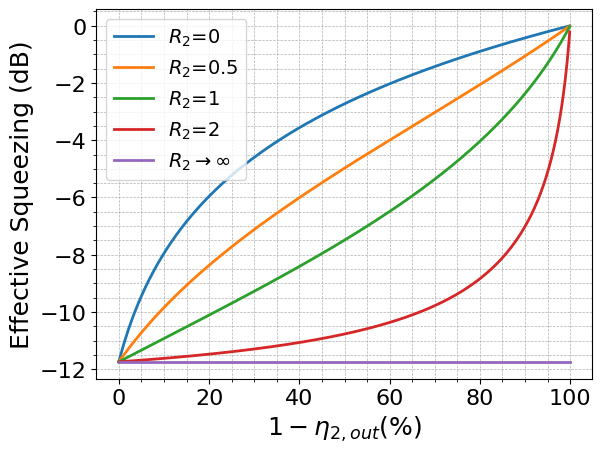

In [237]:

#Figure 9
def plot_cascade_squeezers():
    #Plot squeezing vs outcoupling L_2
    # Parameters
    R1 = 2.1
    theta1 = 14e-3  # Assuming theta1 is constant for this plot
    n1 = 0.96
    theta2 = 0
    R2_values = [0, 0.5,1,2,100]  # Different values of R2

    def Veff_numerical(n1, R1, theta1, n2, R2, theta2):
        return power2dB(lambdified_Veff(n1,R1,theta1,n2,R2,theta2))

    # Generate data
    n2 = np.linspace(1e-3, 1, 1000)
    X = 1 - n2

    # Plot the data
    plt.figure()
    print("Initial squeezing: ", Veff_numerical(n1, R1, theta1, 1, 0, 0))
    for R2 in R2_values:
        Y = Veff_numerical(n1, R1, theta1, n2, R2, theta2)
        plt.plot(X*100, Y, label=r'$R_2$' + '=' + str(R2), linewidth=2)

    #Change the last legend label to be R_2 -> inf
    handles, labels = plt.gca().get_legend_handles_labels()
    labels[-1] = r'$R_2 \rightarrow \infty$'
    plt.legend(handles, labels,fontsize=14)

    plt.xlabel(r'$1-\eta_{2,out}$' + '(%)', fontsize=18)
    plt.ylabel('Effective Squeezing (dB)', fontsize=18)
    plt.minorticks_on()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_cascade_squeezers()

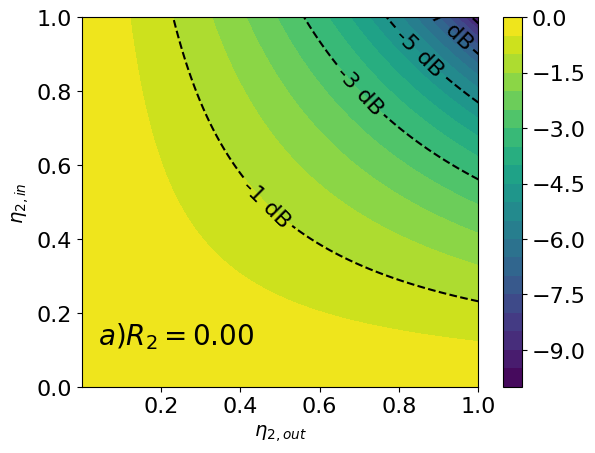

In [238]:
#Figure 10
def Veff_numerical(n1, R1, theta1, n2, R2, theta2):
    return power2dB(lambdified_Veff(n1,R1,theta1,n2,R2,theta2))

def plot_contour_eta_eta(R2):
    #We now wish to plot a contour plot with n1 as the y-axis and n2 as the x-axis
    # Parameters
    R1 = 1.1
    theta1 = 0
    theta2 = 0
    n1_values = np.linspace(0, 1, 100)
    n2_values = np.linspace(1e-3, 1, 10000)


    # Generate data
    X, Y = np.meshgrid(n2_values, n1_values)
    Z = Veff_numerical(Y, R1, theta1, X, R2, theta2)

    # Plot the data
    plt.figure()
    plt.contourf(X, Y, Z, levels=20)
    plt.colorbar()
    plt.xlabel(r'$\eta_{2,out}$', fontsize=14)
    plt.ylabel(r'$\eta_{2,in}$', fontsize=14)

    textstr = '\n'.join((
        r'$a) R_2=%.2f$' % (R2, ),
        ))
    #If we want R2 -> inf, we can use the following textstr
    #textstr = '\n'.join((r'$c) R_2 \rightarrow \infty$',))
    plt.text(0.04, 0.18, textstr, transform=plt.gca().transAxes, fontsize=20,
            verticalalignment='top')

    #Add specific curves for -1,-3,-5,-7 and -9 dB of squeezing
    #Make sure the labels are towards the middle of the plot
    levels = [-9,-7,-5,-3,-1]
    # Manually specify positions for the labels, be careful to not overlap
    manual_positions = [
        (0.1,0.1), (0.6, 0.7), (0.8, 0.85), (0.9, 0.95)
    ]
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linestyles='dashed')
    plt.clabel(contour_lines, fmt='%2.0f dB', colors='black', manual=manual_positions)

    plt.show()

plot_contour_eta_eta(0) #Change to choose R2 value

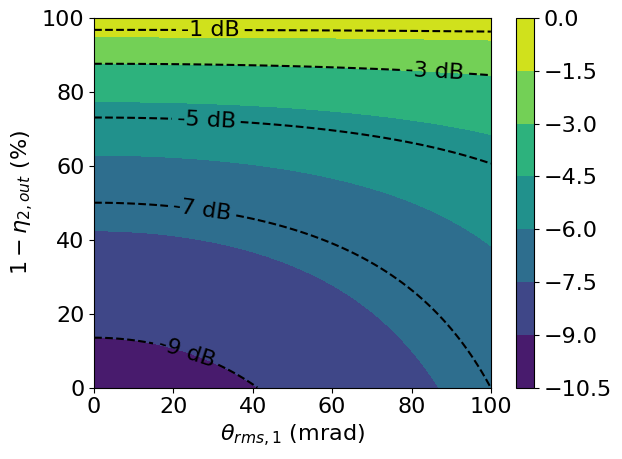

In [239]:
#Figure 11 with theta1
def plot_contour_eta_theta1(R2):
    #Make a contour plot of squeezing levels with 1-n2 on the y axis and theta1 on the x axis
    # n1, R1 and R2 is given. Now create a new function with n2, theta1 and theta 2 as the only variables
    n1 = 1
    R1 = 1.1
    theta2 = 0
    def new_Veff(theta1,n2):
        return power2dB(lambdified_Veff(n1,R1,theta1,n2,R2,theta2))

    theta1 = np.linspace(0,100e-3,100) #Go from 0 to 100mrad
    n2 = np.linspace(0,1,100)
    X,Y = np.meshgrid(theta1*1e3,n2*100)
    Z = np.zeros_like(X)
    for i in range(len(theta1)):
        for j in range(len(n2)):
            Z[j, i] = new_Veff(X[j, i]*1e-3, 1-Y[j, i]/100)
    plt.contourf(X,Y,Z)
    plt.xlabel(r'$\theta_{rms,1}$ (mrad)',fontsize=16)
    plt.ylabel(r'$1-\eta_{2,out}$ (%)',fontsize=16)
    plt.colorbar()
    #Create a textbox specifying the parameters n1,R1,R2,theta2
    textstr = '\n'.join((r'$\eta_1=%.2f$' % (round(n1*100), ) + ' %',
        r'$R_1=%.2f$' % (R1, ),
        r'$R_2=%.2f$' % (R2, ),
        r'$\theta_2=%.2f$' % (round(theta2*1e3), ) + ' mrad'))
    #plt.text(-0.4, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

    # Add specific curves for -3, -5, -7, and -9 dB of squeezing
    levels = [-9,-7,-5,-3,-1]
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linestyles='dashed')
    plt.clabel(contour_lines, fmt='%2.0f dB', colors='black')
    plt.show()

plot_contour_eta_theta1(1.1) #Change to choose R2 value

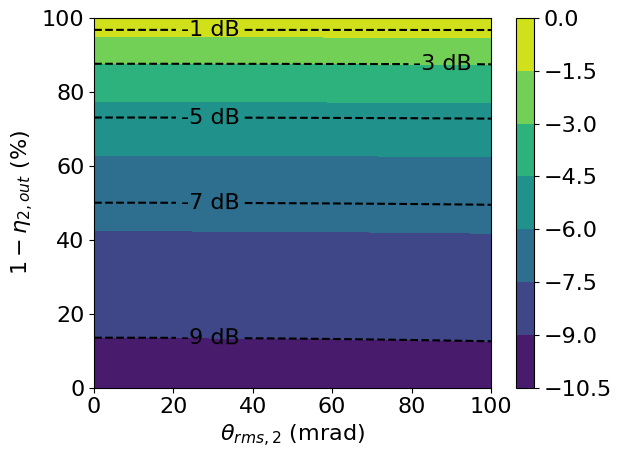

In [240]:
#Figure 11, with theta2
def plot_contour_eta_theta2():
    #Now we want the exact same graph, but with theta2 on the x axis instead of theta 1
    n1 = 1
    R1 = 1.1
    R2 = 1.1
    theta1 = 0
    def new_Veff(theta2,n2):
        return power2dB(lambdified_Veff(n1,R1,theta1,n2,R2,theta2))

    theta2 = np.linspace(0,100e-3,100) #Go from 0 to 100mrad
    n2 = np.linspace(0,1,100)
    X,Y = np.meshgrid(theta2*1e3,n2*100)
    Z = np.zeros_like(X)
    for i in range(len(theta2)):
        for j in range(len(n2)):
            Z[j, i] = new_Veff(X[j, i]*1e-3, 1-Y[j, i]/100)
    plt.contourf(X,Y,Z)
    plt.xlabel(r'$\theta_{rms,2}$ (mrad)',fontsize=16)
    plt.ylabel(r'$1-\eta_{2,out}$ (%)',fontsize=16)
    plt.colorbar()
    #Create a textbox specifying the parameters n1,R1,R2,theta2
    textstr = '\n'.join((
        r'$\eta_1=%.2f$' % (round(n1*100), ) + ' %',
        r'$R_1=%.2f$' % (R1, ),
        r'$R_2=%.2f$' % (R2, ),
        r'$\theta_1=%.2f$' % (round(theta1*1e3), ) + ' mrad'))
    #plt.text(-0.4, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

    # Add specific curves for -3, -5, -7, and -9 dB of squeezing
    levels = [-9,-7,-5,-3,-1]
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linestyles='dashed')
    plt.clabel(contour_lines, fmt='%2.0f dB', colors='black')
    plt.show()

plot_contour_eta_theta2()